# Bagging, Boosting and Meta Learners 

## By: Rhea Sethi

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [9]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

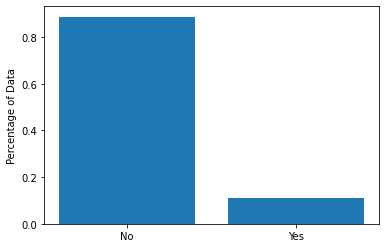

In [11]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
###############
###TRANSFORM###
###############

#I use SMOTE to oversample the minority class

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)

In [14]:
X_scaled

array([[-1.05370899, -0.69511644, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [-1.05370899, -0.94491621, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [ 0.47739924,  0.07349826, -0.1593546 , ..., -0.38060429,
        -0.64821011, -0.21163819],
       ...,
       [-1.31882027, -0.12677626, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [ 1.45341344,  0.21433137, -0.1593546 , ...,  2.62740074,
        -0.64821011, -0.21163819],
       [ 0.88457522,  0.39507776, -0.1593546 , ..., -0.38060429,
        -0.64821011, -0.21163819]])

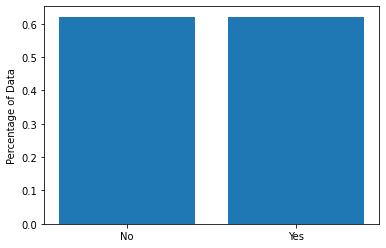

In [15]:
#Checking balance

obs = len(y)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.503\ngini = 0.298\nsamples = 20021\nvalue = [16367, 3654]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.106\nsamples = 10253\nvalue = [9675, 578]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.089\nsamples = 10059\nvalue = [9587, 472]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.496\nsamples = 194\nvalue = [88, 106]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.431\nsamples = 9768\nvalue = [6692, 3076]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 7108\nvalue = [4118, 2990]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.063\nsamples = 2660\nvalue = [2574, 86]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.417\nsamples = 31139\nvalue = [9213, 21926]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.761\ngini = 0.338\nsamples = 25522\nvalue = [5490, 20032]\nclass 

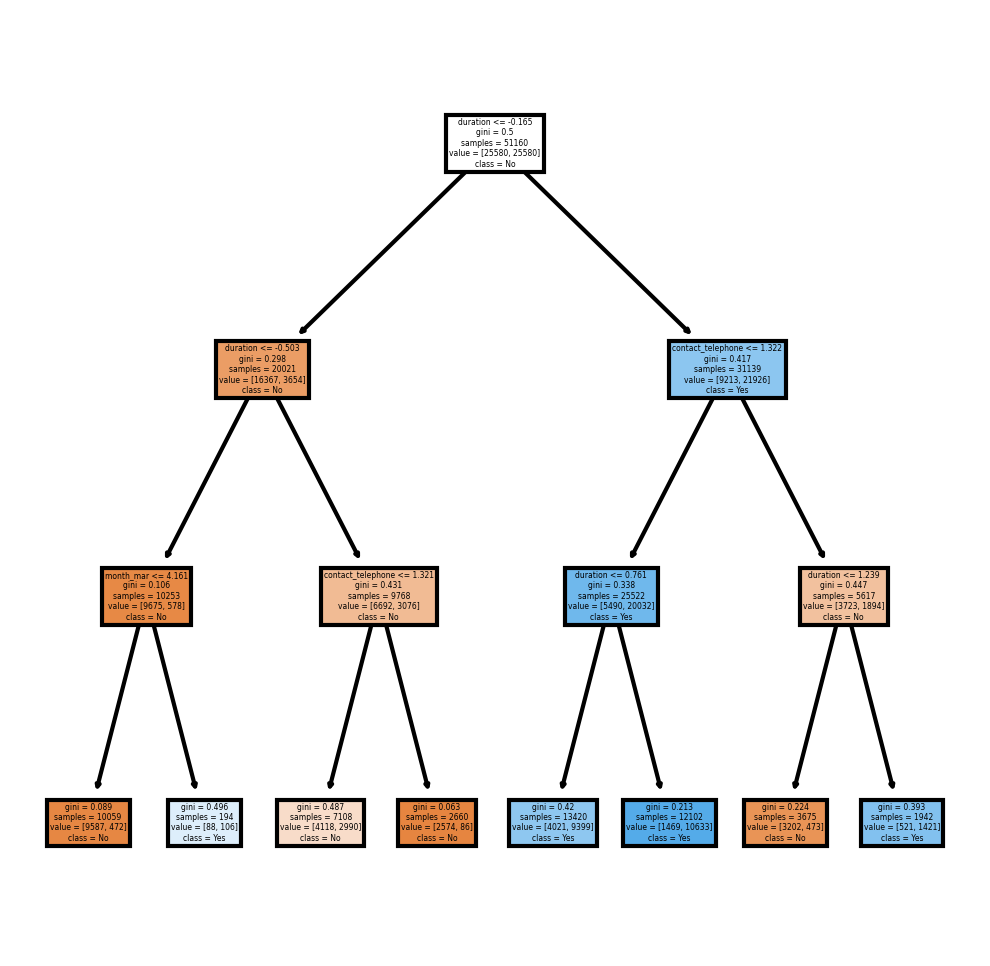

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [19]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

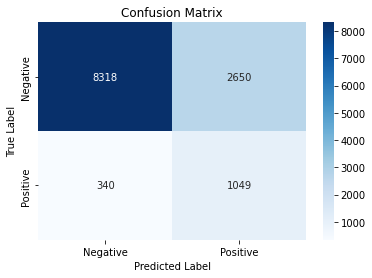

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
#Computing accuracy of Decision Tree
accuracy_score(y_true, y_pred)

0.7580318847616735

# 3.) Use bagging on your descision tree 

In [23]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(base_estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)


bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7498583798656632


In [24]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

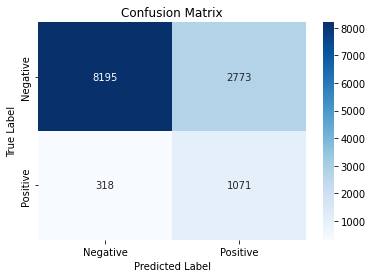

In [25]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#The bagging accuracy is lower than the original decision tree accuracy which is counterintuitive.

# 4.) Boost your tree

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [28]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

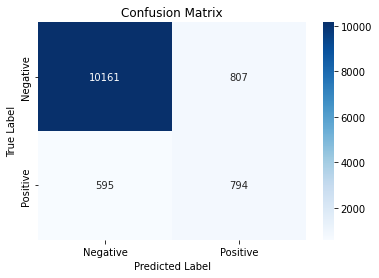

In [29]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
accuracy_score(y_true, y_pred)

#Boosting improves the accuracy score

0.8865420409484502

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [31]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.7 MB/s eta 0:00:00


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

####IMPORT MORE BASE LEARNERS####
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso

from mlens.ensemble import SuperLearner

In [45]:
### SET YOUR BASE LEARNERS

base_learners = [LogisticRegression(),
                RandomForestClassifier(),
                KNeighborsClassifier(n_neighbors = 5),
                Lasso(),
                AdaBoostClassifier()]

super_learner = SuperLearner(folds = 10, random_state = 42)

super_learner.add(base_learners)

### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
### TRAIN YOUR METALEARNER

In [46]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [47]:
log_reg.coef_

array([[  0.79255295,   0.87465742, -13.47222471,  -0.19802182,
         12.93841139]])

**Interpretation**: 

The coefficients for the metalearner give us the weight that each of the base learners' predictions receive in determining the meta learner's output. 

For my model, in terms of magnitude, the K-Nearest Neighbour Classifier has the highest weight followed by the AdaBoostClassifier. The predictions from these two models will have much more influence on the final prediction from the metalearner compared to the other models.

In terms of direction, the KNN and Lasso have negative weights which suggests that the predictions from these models will decrease the probability of the metalearner's prediction to be a 1. 

Overall, the coefficient on KNN would influence the metalearner's predictions to be a 0 while the Adaboost Classifier would push the metalearner's output in the positive direction. The coefficients on the other models would similarly influence the metalearner's prediction but with much lower weight. 

In [56]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX

y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)
cm_super

array([[10420,   548],
       [  796,   593]])

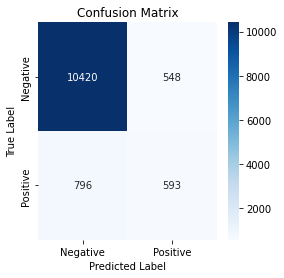

In [84]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4))

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
#Calculating Accuracy Score

accuracy_score(y_true, y_pred)

0.8912357368293276

In [ ]:
#The meta learner gives the best accuracy score

In [85]:
#Saving the Confusion Matrix

fig.savefig('cm_super.png')

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities (Out of Sample)

In [55]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
#Sensitivity = TP / (TP + FN)
#Specificity = TN / (TN + FP)

In [61]:
def sensitivity(confusion_matrix):
  TP = confusion_matrix[1,1]
  FN = confusion_matrix[1,0]
  sensitivity = TP / (TP + FN)
  return sensitivity

In [63]:
def specificity(confusion_matrix):
  TN = confusion_matrix[0,0]
  FP = confusion_matrix[0,1]
  specificity = TN / (TN + FP)
  return specificity

In [68]:
#For Decision Tree
sen1 = sensitivity(cm_raw)
spec1 = specificity(cm_raw)

#For Bagged Decision Tree
sen2 = sensitivity(cm_bag)
spec2 = specificity(cm_bag)

#For Boosted Decision Tree
sen3 = sensitivity(cm_boost)
spec3 = specificity(cm_boost)

#For Boosted Super Learner
sen4 = sensitivity(cm_super)
spec4 = specificity(cm_super)

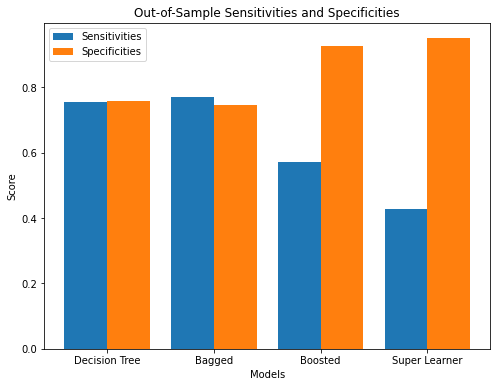

In [79]:
import matplotlib.pyplot as plt 
  
Models = ['Decision Tree','Bagged','Boosted','Super Learner']
Sensitivities = [sen1, sen2, sen3, sen4]
Specificities = [spec1, spec2, spec3, spec4]
  
X_axis = np.arange(len(Models))

plt.figure(figsize= (8,6))
plt.bar(X_axis - 0.2, Sensitivities, 0.4, label = 'Sensitivities')
plt.bar(X_axis + 0.2, Specificities, 0.4, label = 'Specificities')
  
plt.xticks(X_axis, Models)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Out-of-Sample Sensitivities and Specificities")
plt.legend()
plt.show()

The specificity for boosted and super learner models is much higher than the other 2 models, which implies that the boosted and super learner models have a higher proportion of actual Negatives correctly predicted as Negatives. This may be useful for our business problem here as it may help target more people who are not subscribing.